In [30]:
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 4)

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print('train data shape:', train_data.shape)
print('train data axes dimensions:', train_data.ndim)
print(len(train_data[0]))
print(len(train_data[1]))

train data shape: (25000,)
train data axes dimensions: 1
218
189


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
print('train labels shape:', train_labels.shape)
print('train labels axes dimensions:', train_labels.ndim)
print(train_labels[0])
print(train_labels[1])

train labels shape: (25000,)
train labels axes dimensions: 1
1
0


In [6]:
print('test data shape:', test_data.shape)
print('teset labels shape:', test_labels.shape)

test data shape: (25000,)
teset labels shape: (25000,)


In [7]:
word_index = imdb.get_word_index()

In [8]:
len(word_index)

88584

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [10]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
y_train = np.asarray(train_labels, dtype=np.float32)
y_test = np.asarray(test_labels, dtype=np.float32)

In [16]:
y_train, y_train.shape

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32), (25000,))

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
from keras import optimizers
from keras import losses
from keras import metrics

In [20]:
model.compile(optimizer=optimizers.RMSprop(), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [21]:
x_val = x_train[:10000]
y_val = y_train[:10000] 

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3087 - val_binary_accuracy: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1750 - binary_accuracy: 0.9438 - val_loss: 0.2840 - val_binary_accuracy: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1427 - binary_accuracy: 0.9542 - val_loss: 0.2841 - val_binary_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1150 - binary_accuracy: 0.9651 - val_loss: 0.3162 - val_bi

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_binary_accuracy', 'loss', 'binary_accuracy', 'val_loss'])

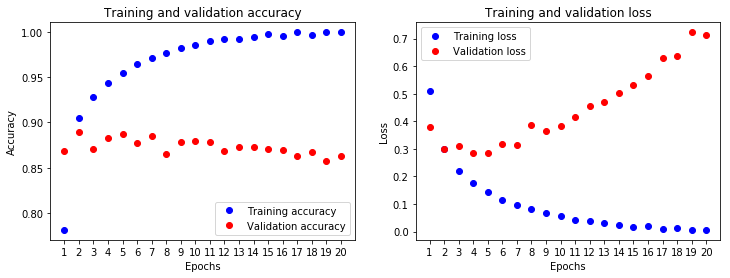

In [31]:
# Plot accuracy and loss
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)

plt.subplot(121)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'ro',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values,'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [40]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [42]:
model.fit(x_train, y_train, batch_size=512, epochs=4)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.4392 - acc: 0.8239
Epoch 2/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2522 - acc: 0.9119
Epoch 3/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.1912 - acc: 0.9325
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.1653 - acc: 0.9397


In [43]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 96us/step


[0.29839944286346437, 0.88152]